# Preprocessing Data Aplikasi EcoMeter: Tracking Urban Footprints for Climate Resilience





## 1. Import Libraries

Mengimpor library yang diperlukan untuk eksplorasi dan preprocessing data.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Libraries for preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Library for splitting the data
from sklearn.model_selection import train_test_split

# TensorFlow library
import tensorflow as tf


## 2. Load Dataset

Mengimpor dataset yang telah diunggah ke Google Colab atau dari sumber eksternal seperti GitHub.

In [ ]:
url_motorcycle_emissions = "https://raw.githubusercontent.com/Ardizza/Bangkit-Product-Capstone/main/Dataset/Data%20Emisi/Data%20Penggunaan%20Transportasi/CO2%20Emission%20by%20Vehicles/motorcycles.csv"
url_car_emissions = "https://raw.githubusercontent.com/Ardizza/Bangkit-Product-Capstone/main/Dataset/Data%20Emisi/Data%20Penggunaan%20Transportasi/CO2%20Emission%20by%20Vehicles/CO2%20Emissions_Canada.csv"

motorcycle_emissions_data = pd.read_csv(url_motorcycle_emissions)
car_emissions_data = pd.read_csv(url_car_emissions)

## 3. Eksplorasi Data

Melakukan eksplorasi awal terhadap dataset untuk memahami struktur dan karakteristik data.

### Car Emissions


In [ ]:
df = pd.read_csv(url_car_emissions)
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
# Mengecek 10 data pertama
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
# Mengecek 10 data terbawah
df.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7375,VOLVO,S90 T6 AWD,MID-SIZE,2.0,4,AS8,Z,11.3,7.5,9.6,29,223
7376,VOLVO,V60 T5,STATION WAGON - SMALL,2.0,4,AS8,Z,10.5,7.1,8.9,32,208
7377,VOLVO,V60 T6 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,11.0,7.4,9.4,30,219
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220
7379,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4,AS8,X,10.2,7.5,9.0,31,210
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [ ]:
# Mengecek apakah ada nilai kosong
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
# Mengecek informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
# Mengecek ukuran dari dataset (row dan column)
df.shape

(7385, 12)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


#### Visualisasi Setiap Variabel

In [ ]:
# Mengecek jumlah merk kendaraan pada dataset
print("Terdapat",len(df['Make'].unique()),"merk kendaraan mobil pada dataset")
df_brand = df['Make'].value_counts().reset_index()
df_brand.head(20)

Terdapat 42 merk kendaraan mobil pada dataset


,Make,count
0,FORD,628
1,CHEVROLET,588
2,BMW,527
3,MERCEDES-BENZ,419
4,PORSCHE,376
5,TOYOTA,330
6,GMC,328
7,AUDI,286
8,NISSAN,259
9,JEEP,251


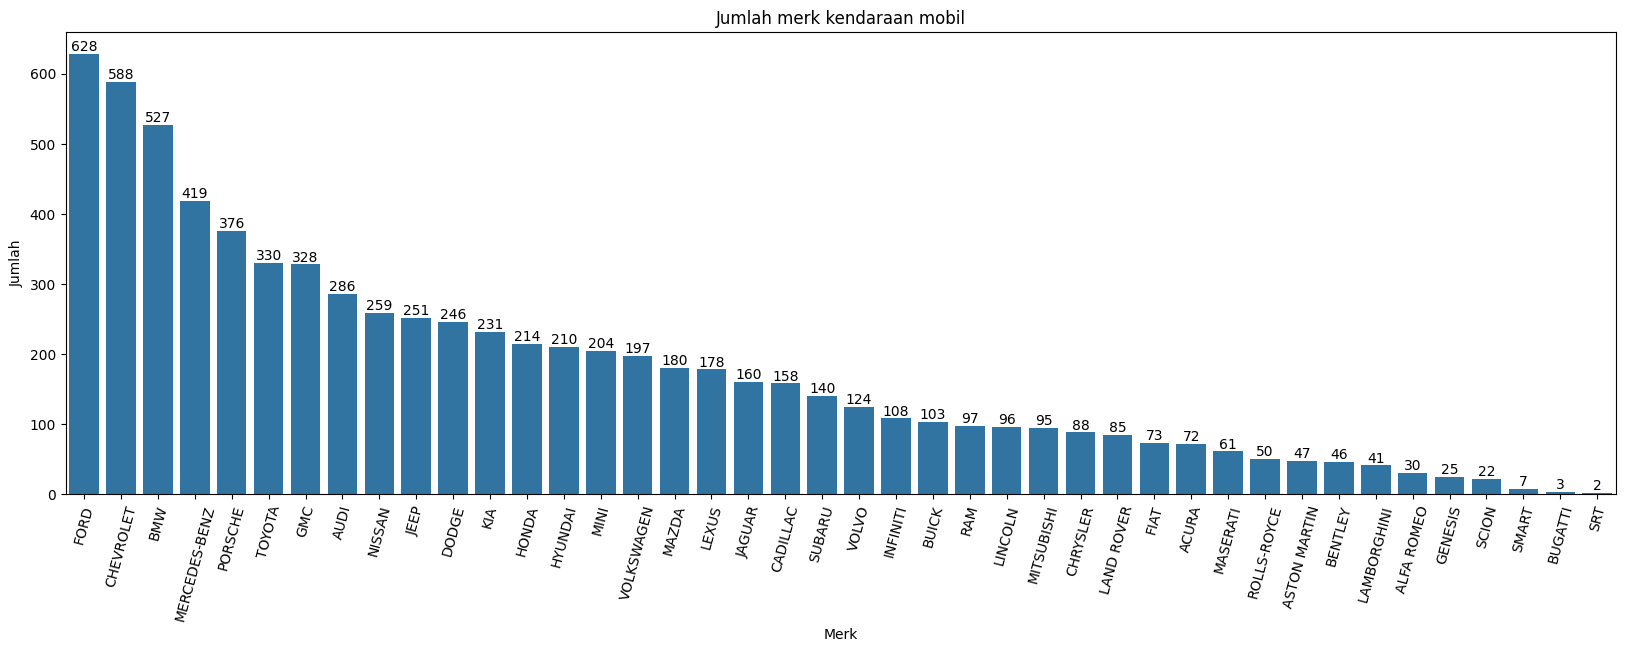

In [ ]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(data=df_brand, x="Make", y="count")
plt.xticks(rotation = 75)
plt.title("Jumlah merk kendaraan mobil")
plt.xlabel("Merk")
plt.ylabel("Jumlah")
plt.bar_label(figure1.containers[0])
plt.show()

In [ ]:
# Mengecek ukuran mesin mobil pada dataset
print("Terdapat", len(df['Engine Size(L)'].unique()), "jenis ukuran mesin pada dataset")
df_engine_size = df['Engine Size(L)'].value_counts().reset_index()
df_engine_size.head(20)

Terdapat 51 jenis ukuran mesin pada dataset


,Engine Size(L),count
0,2.0,1460
1,3.0,804
2,3.6,536
3,3.5,529
4,2.5,423
5,2.4,346
6,1.6,302
7,5.3,290
8,1.8,216
9,1.4,211


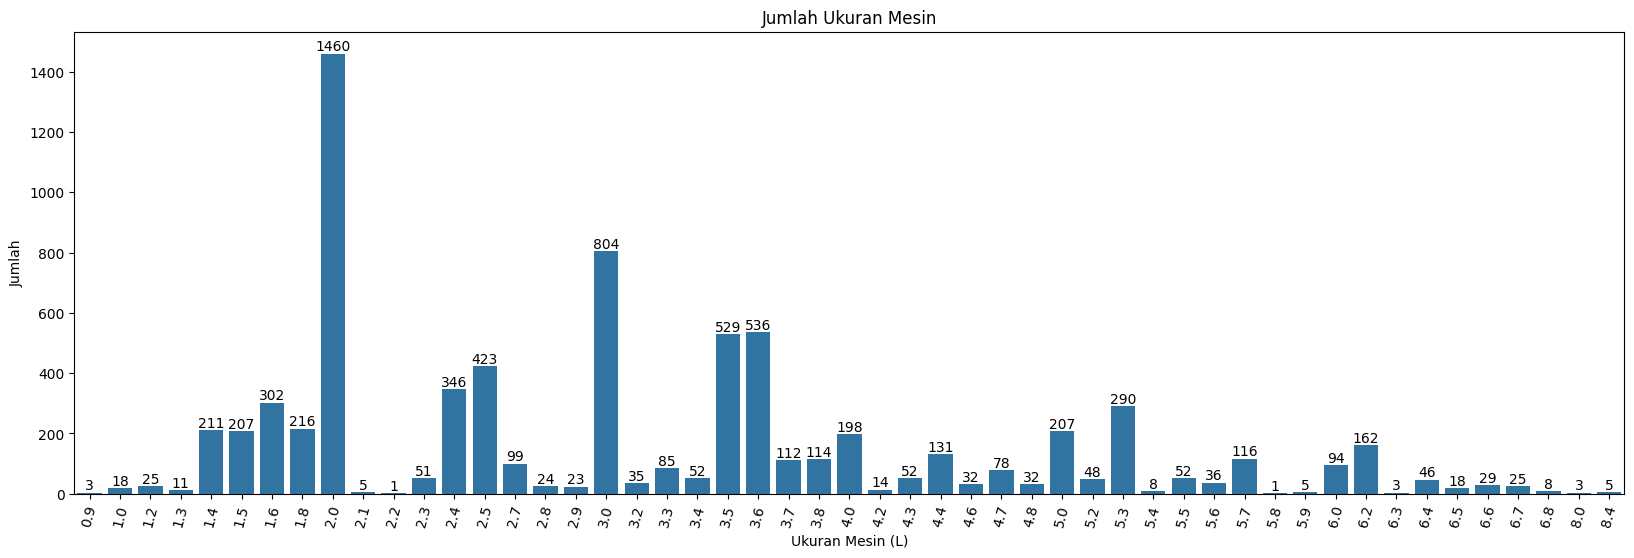

In [ ]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(data=df_engine_size, x="Engine Size(L)", y="count")
plt.xticks(rotation = 75)
plt.title("Jumlah Ukuran Mesin")
plt.xlabel("Ukuran Mesin (L)")
plt.ylabel("Jumlah")
plt.bar_label(figure1.containers[0])
plt.show()

In [ ]:
# Mengecek jumlah jenis silinder pada kendaraan mobil di dalam dataset
print("Terdapat", len(df['Cylinders'].unique()), "jenis dari silinder")
df_cylinders = df['Cylinders'].value_counts().reset_index()
df_cylinders.head(20)

Terdapat 8 jenis dari silinder


,Cylinders,count
0,4,3220
1,6,2446
2,8,1402
3,12,151
4,3,95
5,10,42
6,5,26
7,16,3


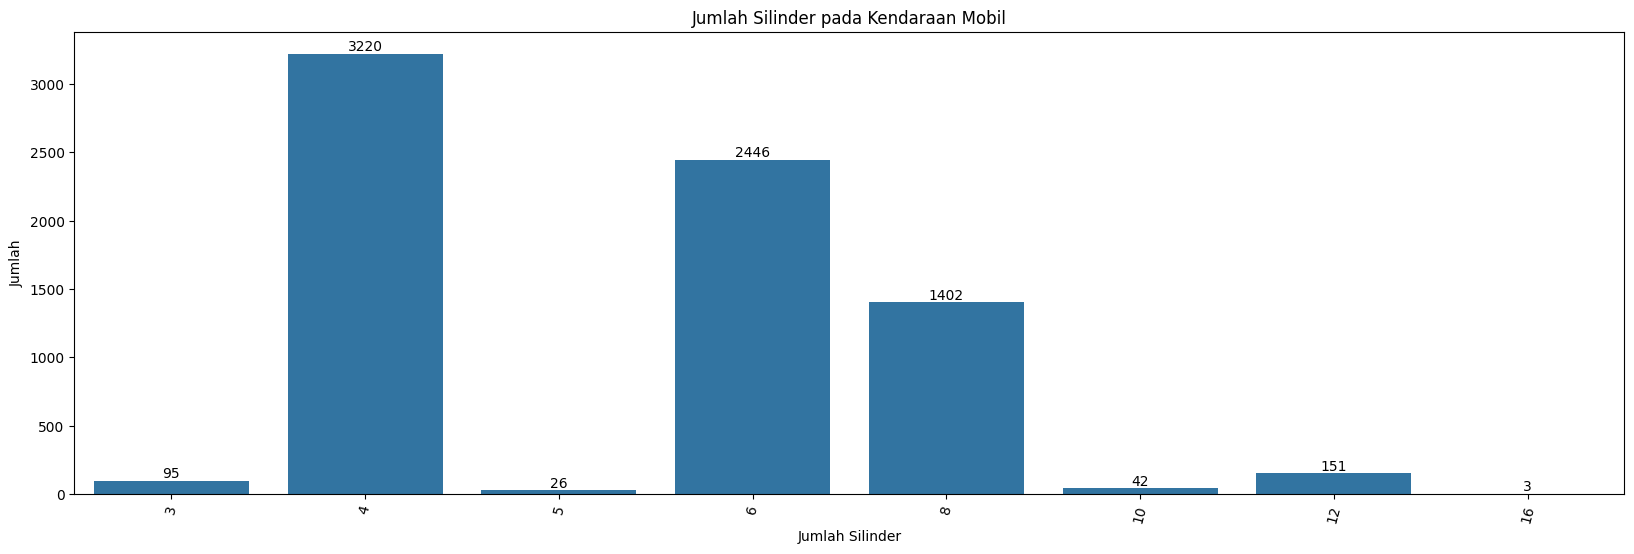

In [ ]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(data=df_cylinders, x="Cylinders", y="count")
plt.xticks(rotation = 75)
plt.title("Jumlah Silinder pada Kendaraan Mobil")
plt.xlabel("Jumlah Silinder")
plt.ylabel("Jumlah")
plt.bar_label(figure1.containers[0])
plt.show()

In [ ]:
# Mengecek Transmisi Mobil pada dataset
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [ ]:
# Melakukan mapping label transmisi
df["Transmission"] = np.where(df["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["M5", "M6", "M7"]), "Manual", df["Transmission"])

In [ ]:
print("Terdapat", len(df['Transmission'].unique()), "jenis transmisi pada dataset")
df_transmission = df['Transmission'].value_counts().reset_index()
df_transmission

Terdapat 5 jenis transmisi pada dataset


,Transmission,count
0,Automatic with Select Shift,3127
1,Automatic,1851
2,Manual,1185
3,Automated Manual,646
4,Continuously Variable,576


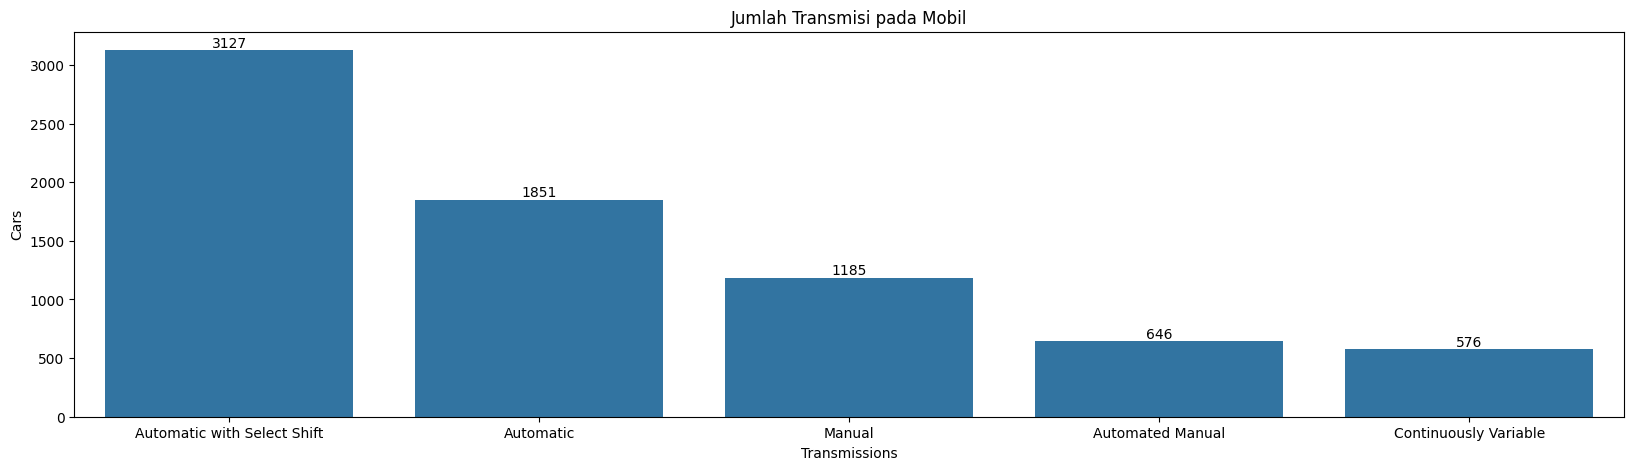

In [ ]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_transmission, x = "Transmission",  y= "count")
plt.title("Jumlah Transmisi pada Mobil")
plt.xlabel("Transmissions")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

## 4. Transformasi Data

### Car Emissions


In [ ]:
# Mengecek jenis bahan bakar yang digunakan pada kendaraan mobil di dalam dataset

df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [ ]:
# Melakukan perubahan label bahan bakar
df["Fuel Type"] = np.where(df["Fuel Type"]=="Z", "Premium Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="X", "Regular Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="D", "Diesel", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="E", "Ethanol(E85)", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="N", "Natural Gas", df["Fuel Type"])

In [ ]:
print("Terdapat", len(df['Fuel Type'].unique()), "jenis bahan bakar di dalam dataset")
df_fuel = df['Fuel Type'].value_counts().reset_index()
df_fuel

Terdapat 5 jenis bahan bakar di dalam dataset


,Fuel Type,count
0,Regular Gasoline,3637
1,Premium Gasoline,3202
2,Ethanol(E85),370
3,Diesel,175
4,Natural Gas,1


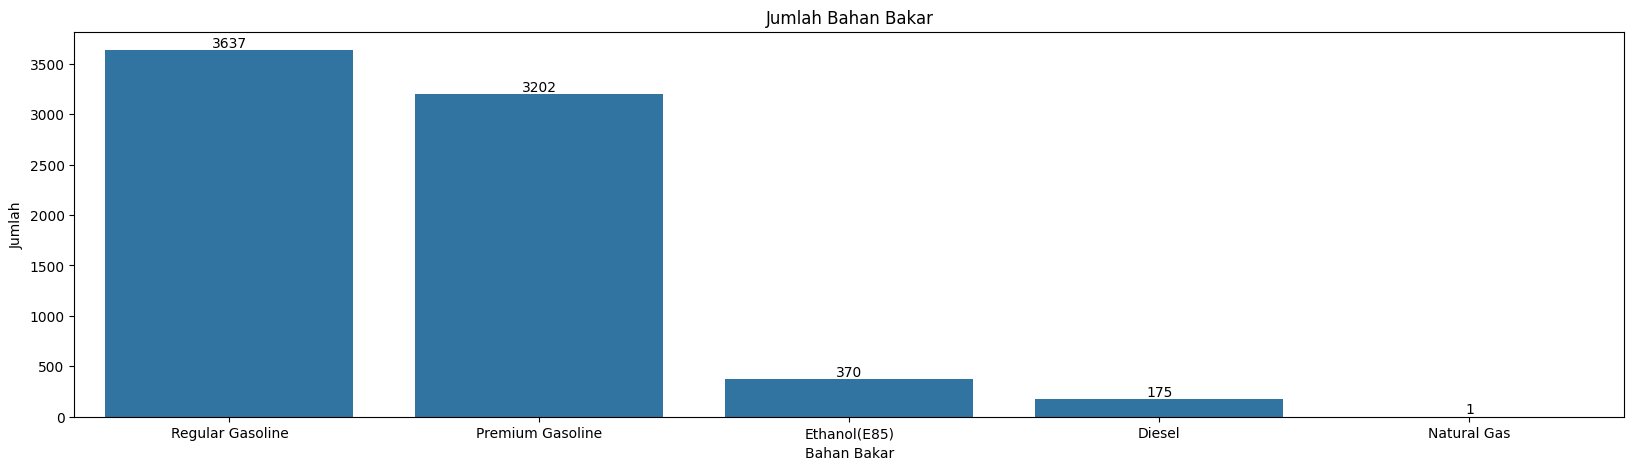

In [ ]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = df_fuel, x = "Fuel Type",  y= "count")
plt.title("Jumlah Bahan Bakar")
plt.xlabel("Bahan Bakar")
plt.ylabel("Jumlah")
plt.bar_label(figure7.containers[0])
plt.show()

In [ ]:
# Emisi Karbon Dioksida Dengan Merk
df_co2_make = df.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

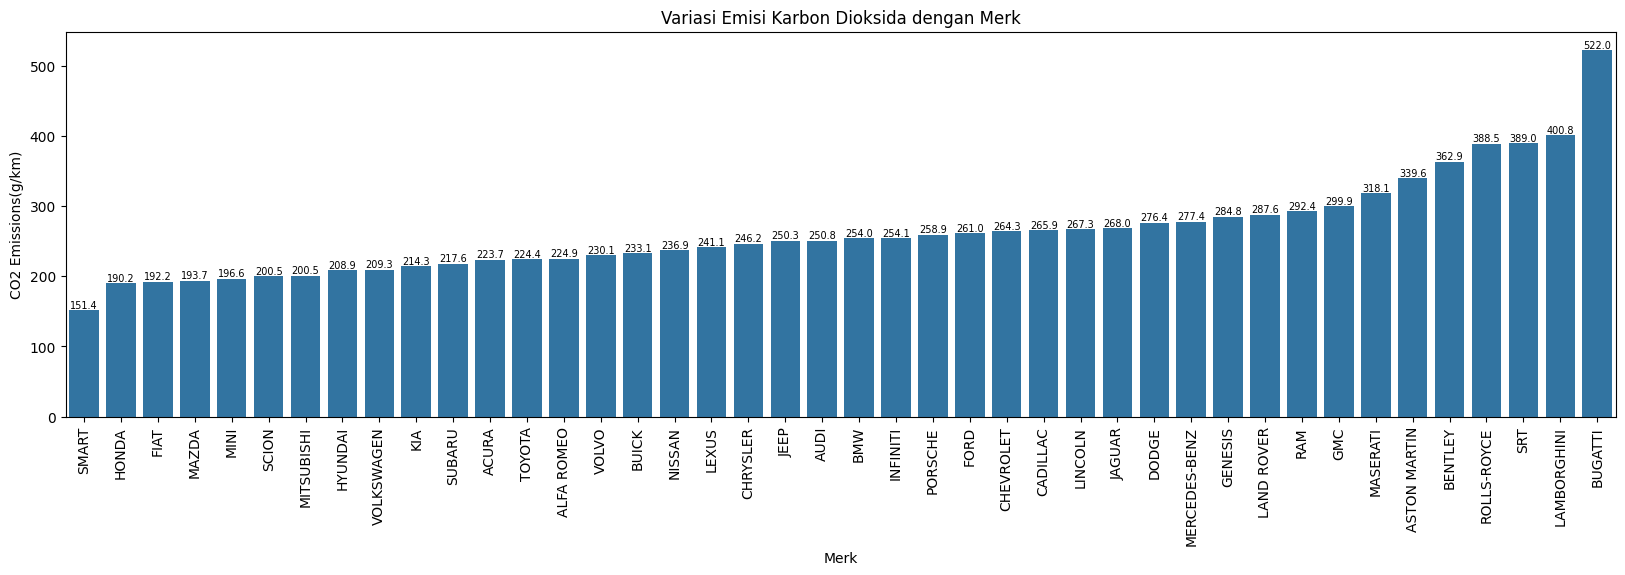

In [ ]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(data = df_co2_make, x = "Make",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("Variasi Emisi Karbon Dioksida dengan Merk")
plt.xlabel("Merk")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure8.containers[0], fontsize=7, fmt='%.1f')
plt.show()

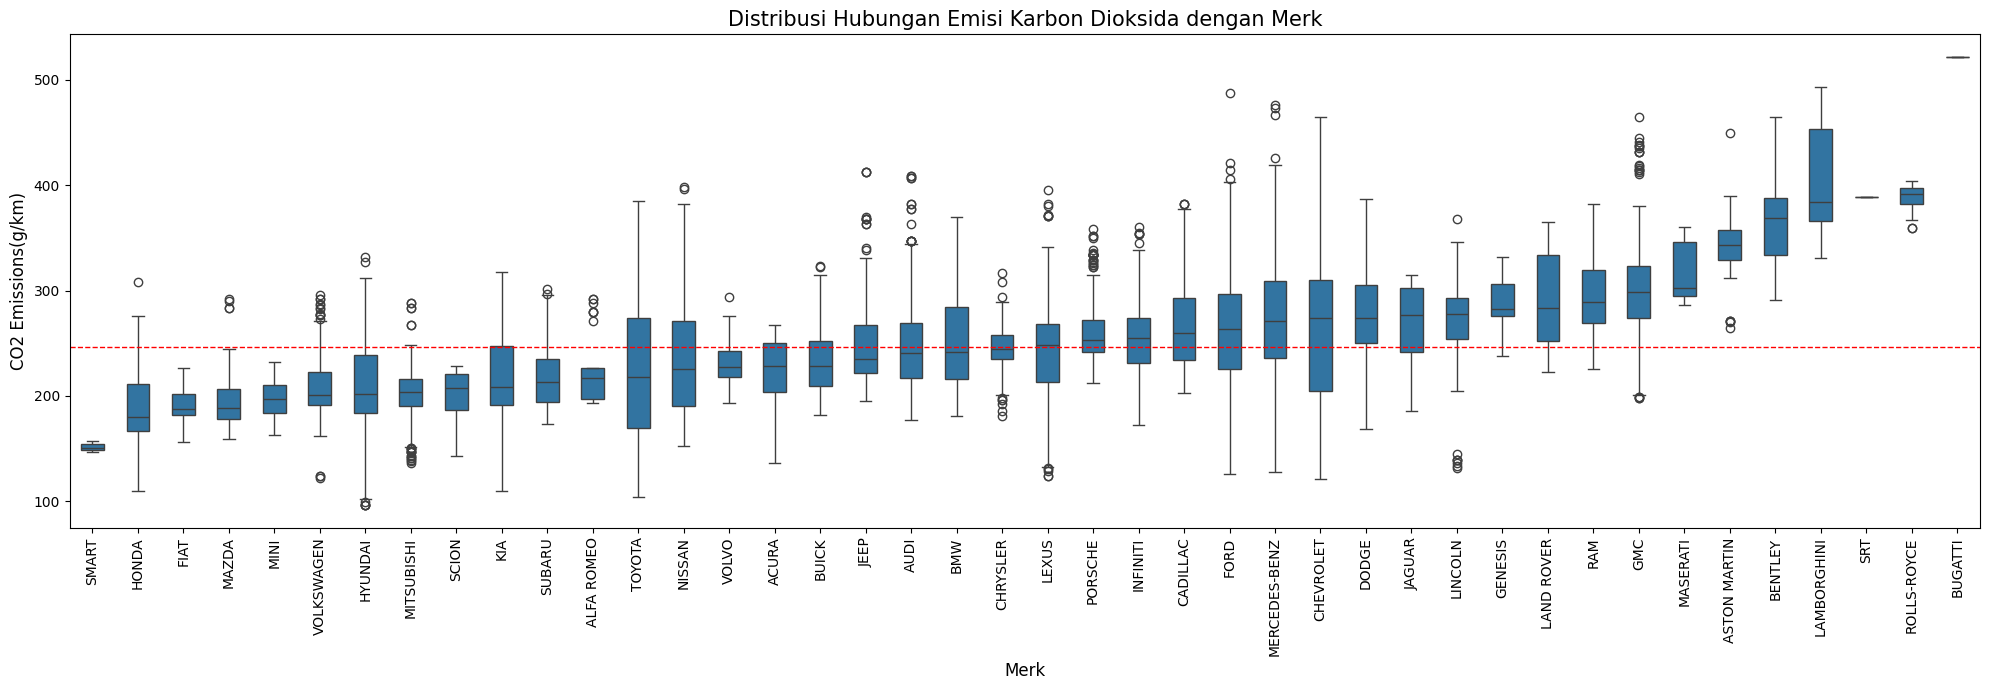

In [ ]:
plt.figure(figsize=(20,7))
order = df.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribusi Hubungan Emisi Karbon Dioksida dengan Merk", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Merk", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [ ]:
# Emisi Karbon Dioksida Dengan Ukuran Mesin
df_co2_engine_size = df.groupby(['Engine Size(L)'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

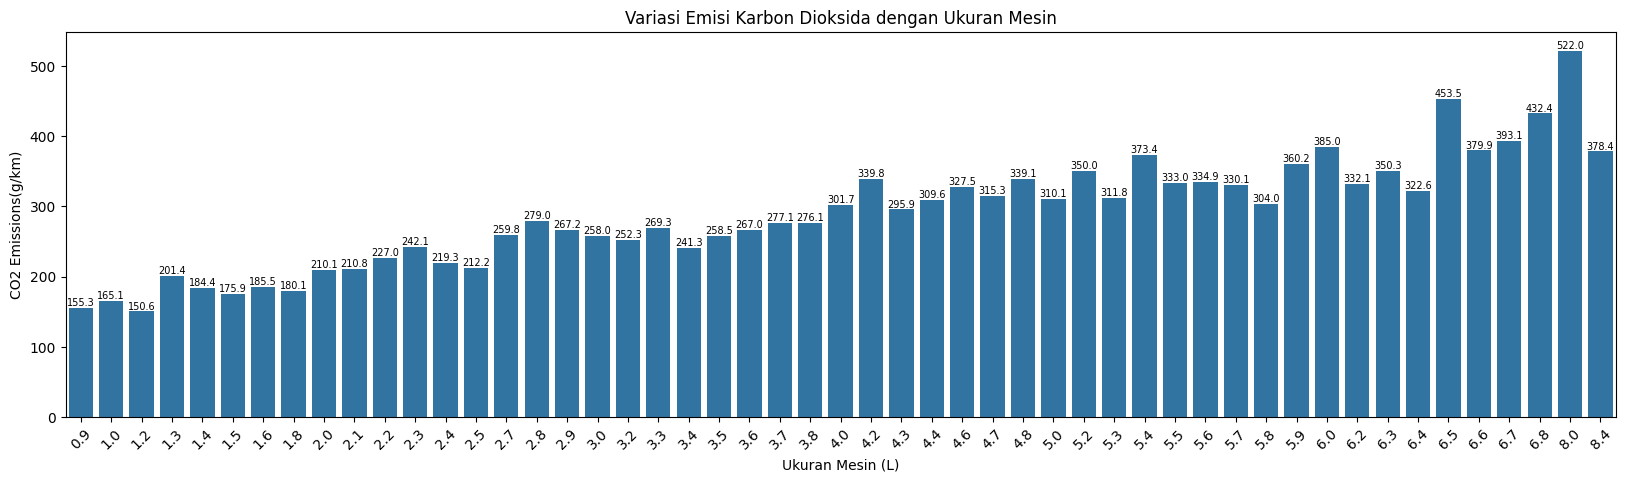

In [ ]:
plt.figure(figsize=(20,5))
figure9 = sns.barplot(data = df_co2_engine_size, x = "Engine Size(L)",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 45)
plt.title("Variasi Emisi Karbon Dioksida dengan Ukuran Mesin")
plt.xlabel("Ukuran Mesin (L)")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure9.containers[0], fontsize=7, fmt='%.1f')
plt.show()

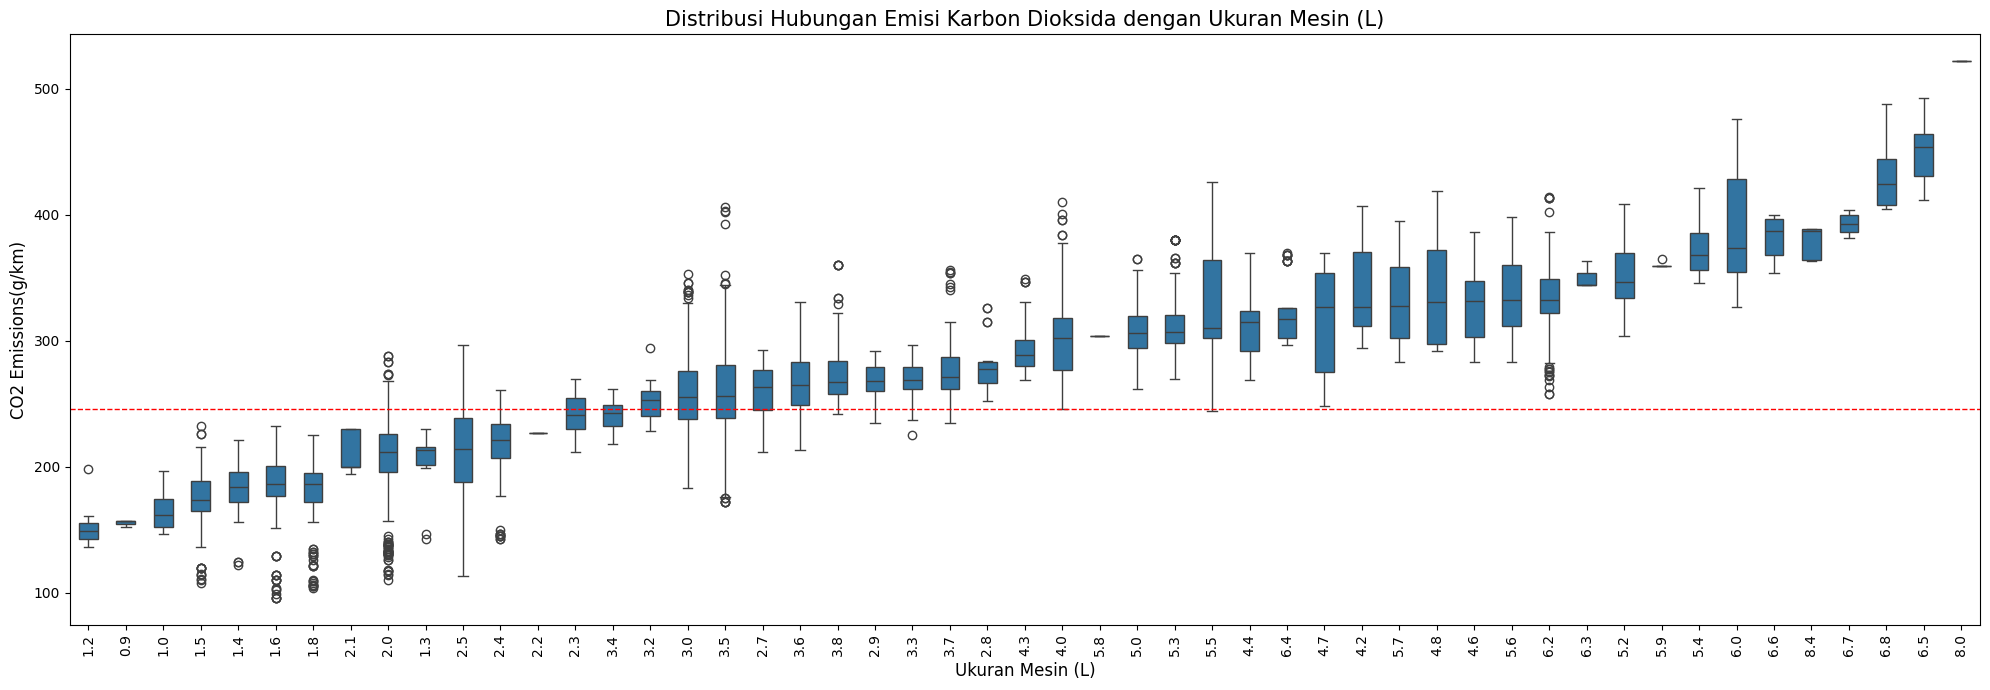

In [ ]:
plt.figure(figsize=(20,7))
order = df.groupby("Engine Size(L)")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribusi Hubungan Emisi Karbon Dioksida dengan Ukuran Mesin (L)", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Ukuran Mesin (L)", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [ ]:
# Emisi Karbon Dioksida Dengan Jumlah Silinder
df_co2_cylinders = df.groupby(['Cylinders'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

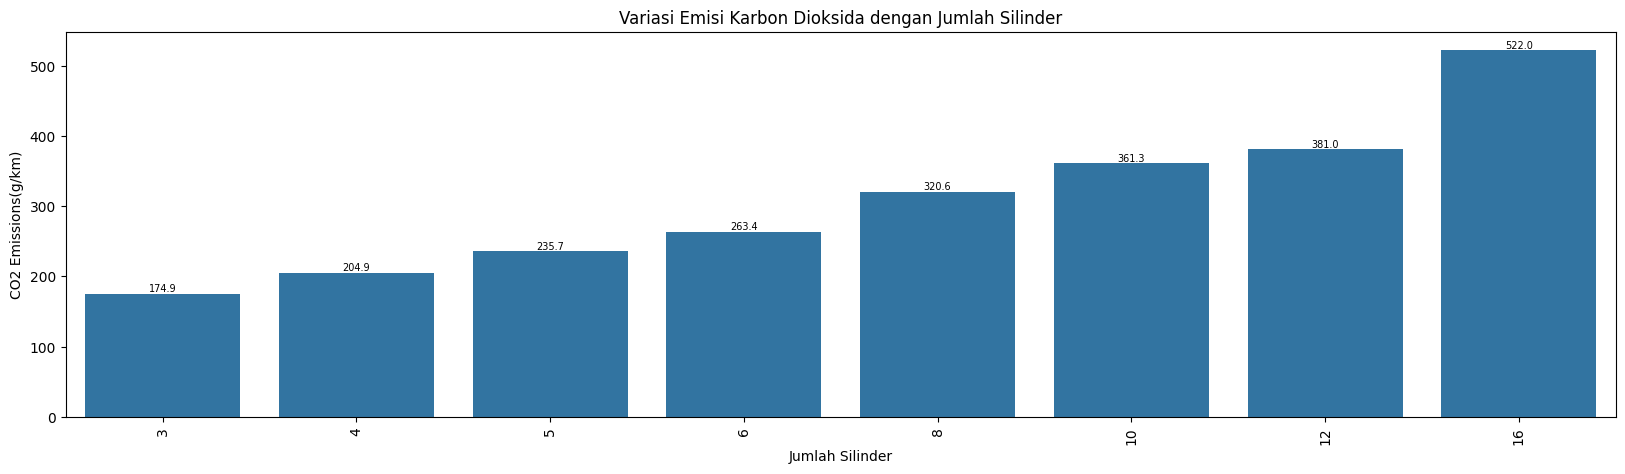

In [ ]:
plt.figure(figsize=(20,5))
figure10 = sns.barplot(data = df_co2_cylinders, x = "Cylinders",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("Variasi Emisi Karbon Dioksida dengan Jumlah Silinder")
plt.xlabel("Jumlah Silinder")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure10.containers[0], fontsize=7, fmt='%.1f')
plt.show()

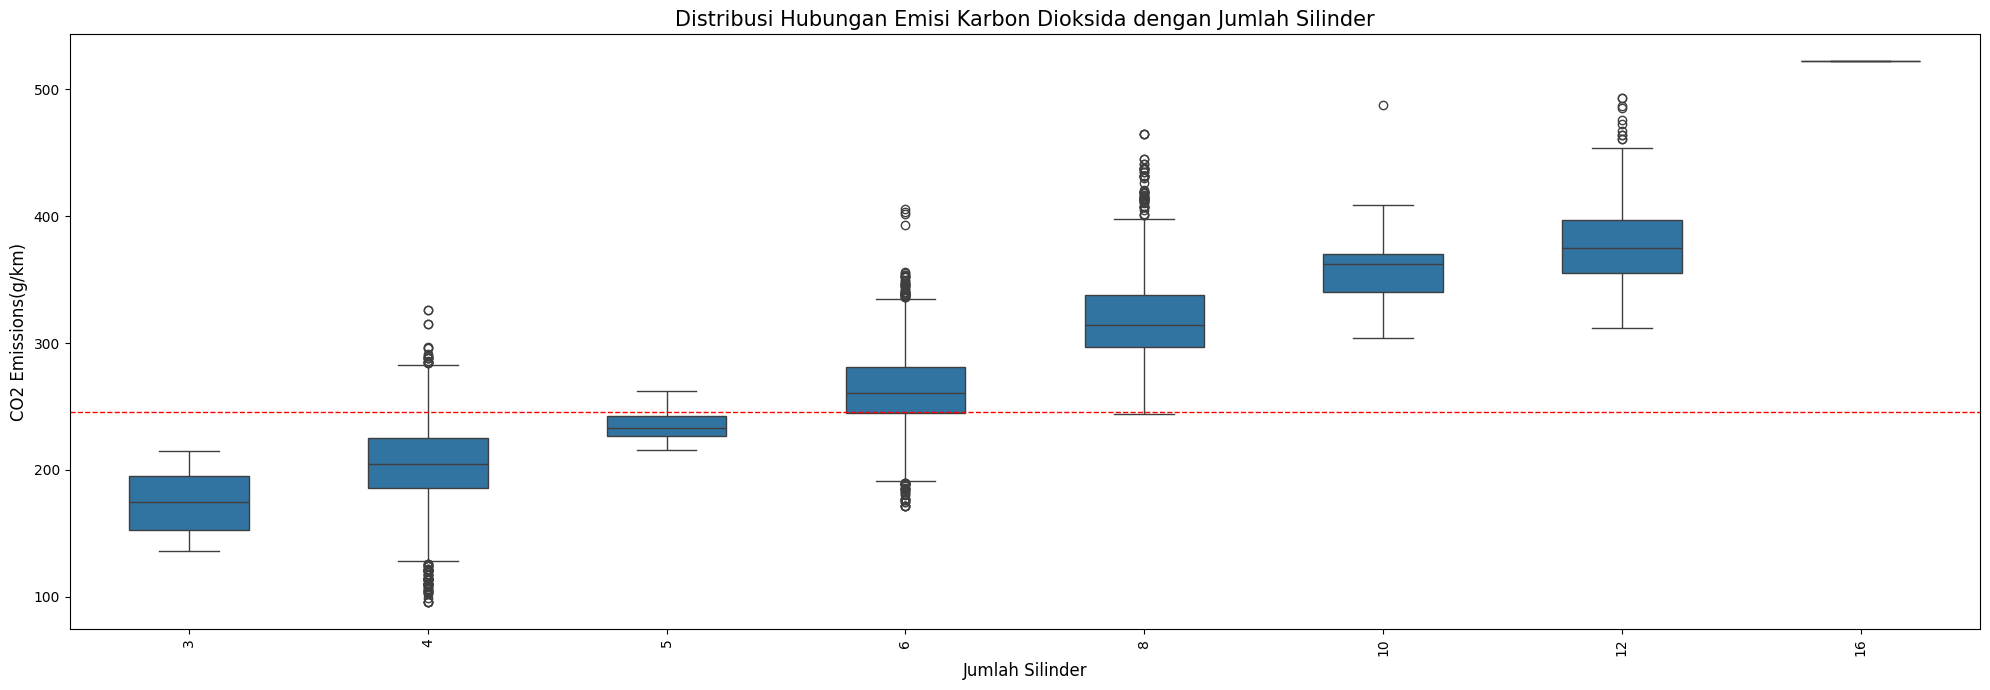

In [ ]:
plt.figure(figsize=(20,7))
order = df.groupby("Cylinders")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribusi Hubungan Emisi Karbon Dioksida dengan Jumlah Silinder", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Jumlah Silinder", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [ ]:
# Emisi Karbon Dioksida Dengan Jenis Bahan Bakar
df_co2_fuel_type = df.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

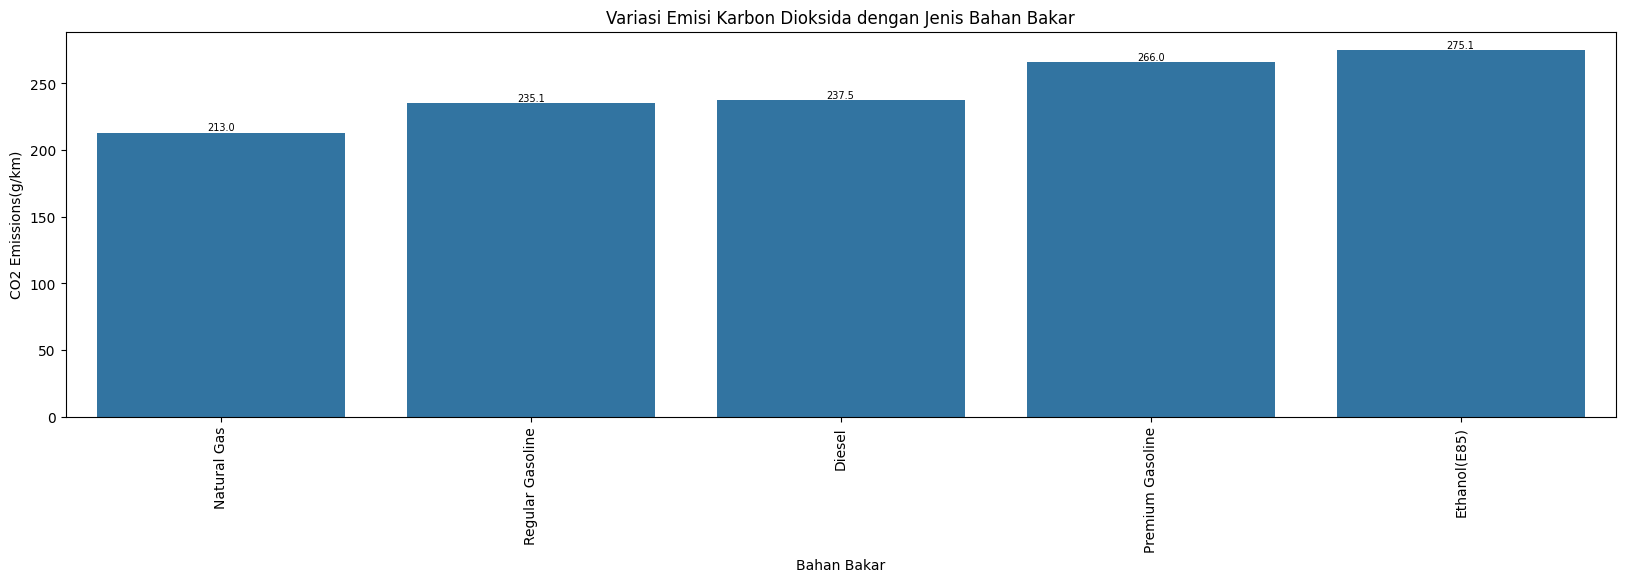

In [ ]:
plt.figure(figsize=(20,5))
figure11 = sns.barplot(data = df_co2_fuel_type, x = "Fuel Type",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("Variasi Emisi Karbon Dioksida dengan Jenis Bahan Bakar")
plt.xlabel("Bahan Bakar")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure11.containers[0], fontsize=7, fmt='%.1f')
plt.show()

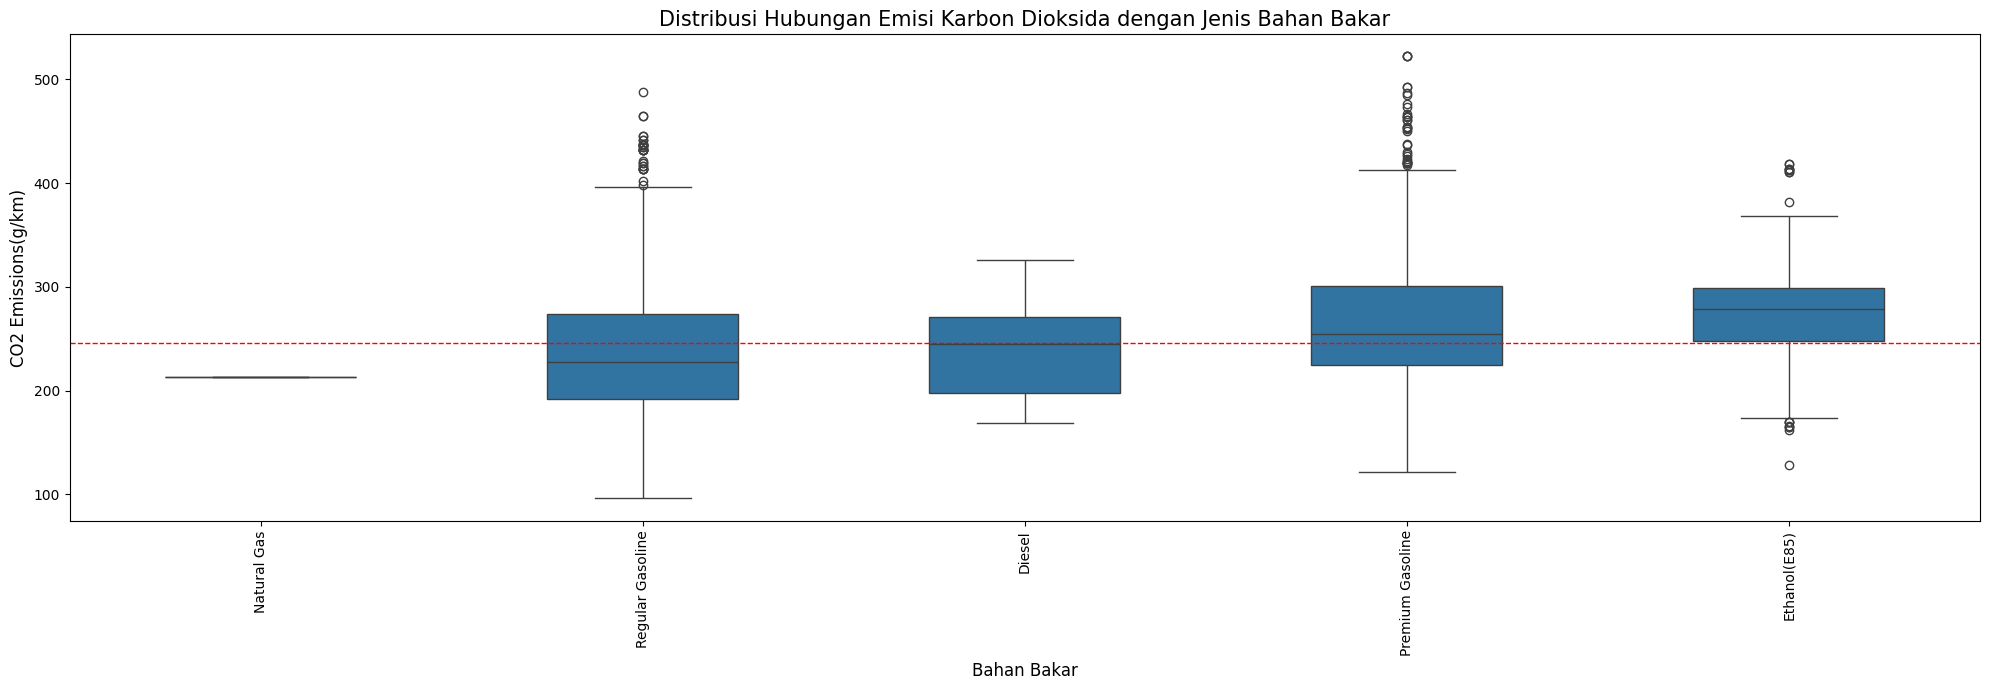

In [ ]:
plt.figure(figsize=(20,7))
order = df.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribusi Hubungan Emisi Karbon Dioksida dengan Jenis Bahan Bakar", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Bahan Bakar", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

## 5. Cleaning Data

Menangani nilai yang hilang, duplikasi, dan kesalahan data.

In [ ]:
# Menghapus data kendaraan mobil yang menggunakan bahan bakar gas alami (natural gas)
df_natural = df[df["Fuel Type"] == "Natural Gas"]
natural = df_natural.index
df_natural

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,Automatic with Select Shift,Natural Gas,15.2,9.5,12.7,22,213


In [ ]:
for i in natural:
    df.drop(i, axis=0, inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df[df["Fuel Type"]=="Natural Gas"]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [ ]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,10.7,7.7,9.4,30,219
7380,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232
7381,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.7,8.6,10.3,27,240
7382,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232


In [ ]:
df_check = df["Fuel Type"].value_counts().reset_index()
df_check

,Fuel Type,count
0,Regular Gasoline,3637
1,Premium Gasoline,3202
2,Ethanol(E85),370
3,Diesel,175


In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


In [ ]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7379,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,10.7,7.7,9.4,30,219
7380,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232
7381,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.7,8.6,10.3,27,240
7382,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232
7383,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,Automatic with Select Shift,Premium Gasoline,12.2,8.7,10.7,26,248


In [ ]:
# Untuk mengecek korelasi dataset, akan menghapus variabel "Mode", "Make", "Vehicle CLass", "Transmission", "Fuel Type"

df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Transmission','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)

In [ ]:
df_correlation = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
df_correlation

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
7379,2.0,4,9.4,219
7380,2.0,4,9.9,232
7381,2.0,4,10.3,240
7382,2.0,4,9.9,232


In [ ]:
df_correlation.corr().T

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.817059,0.851203
Cylinders,0.927653,1.000000,0.780538,0.832688
Fuel Consumption Comb (L/100 km),0.817059,0.780538,1.000000,0.918151
CO2 Emissions(g/km),0.851203,0.832688,0.918151,1.000000


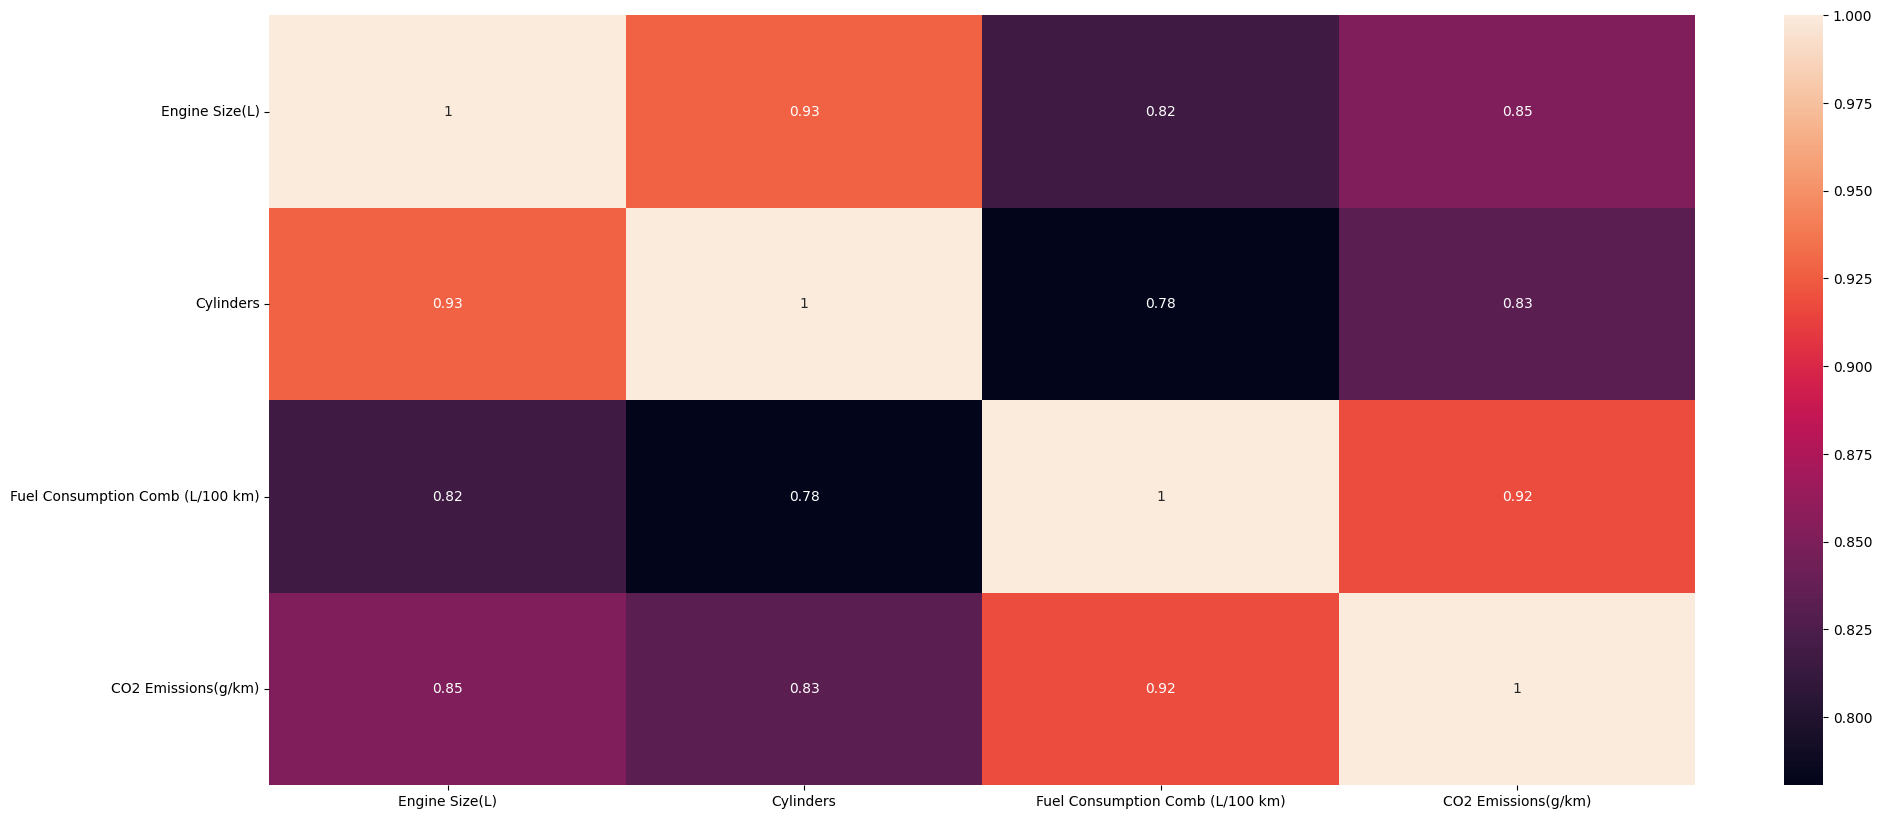

In [ ]:
plt.figure(figsize = (23, 10))
sns.heatmap(df_correlation.corr(), annot=True)
plt.show()

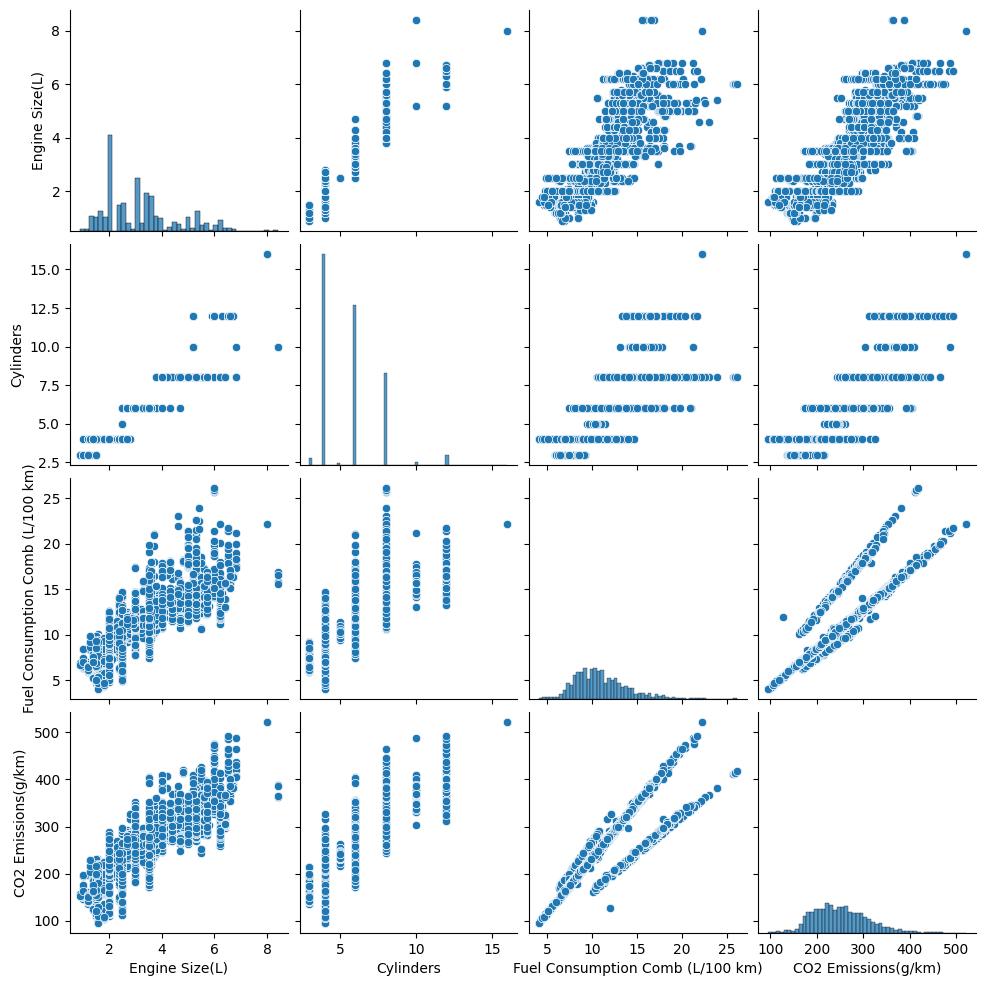

In [ ]:
sns.pairplot(df_correlation)

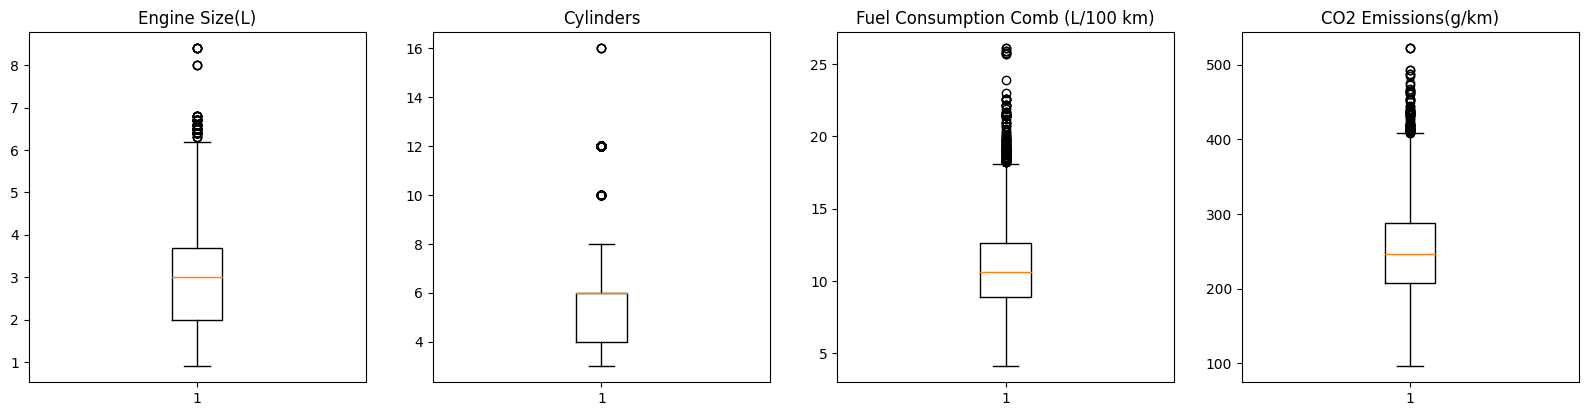

In [ ]:
### Melakukan penghapusan data outliers
plt.figure(figsize = (20, 10))
for i in enumerate(df_correlation):
    plt.subplot(2, 4, i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_correlation[i[1]])

In [ ]:
df_new = df_correlation[(np.abs(stats.zscore(df_correlation)) < 1.9).all(axis=1)]

In [ ]:
df_new.reset_index(drop=True, inplace=True)

In [ ]:
df_new

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.6,244
4,3.5,6,10.0,230
...,...,...,...,...
6504,2.0,4,9.4,219
6505,2.0,4,9.9,232
6506,2.0,4,10.3,240
6507,2.0,4,9.9,232


## 6. Persiapan untuk Modelling


Mempersiapkan data untuk pemodelan machine learning.

### Car Emissions

#### Pengambilan Sampel


In [ ]:
sample_df = df_new.sample(n=200, random_state=35)
sample_df

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
4345,3.2,6,10.3,241
3129,3.6,6,10.3,242
2747,3.4,6,10.4,245
13,4.7,8,15.4,354
3850,2.0,4,7.6,177
...,...,...,...,...
918,2.0,4,9.6,221
6259,2.0,4,6.0,140
1646,3.0,6,10.1,232
4204,5.0,8,13.2,312


In [ ]:
indexs = sample_df.index
indexs

Index([4345, 3129, 2747,   13, 3850, 4585, 3814, 5798, 3153, 5184,
       ...
         34, 3229, 5169, 2132, 4731,  918, 6259, 1646, 4204, 2399],
      dtype='int64', length=200)

In [ ]:
sample_df_Xtest["Engine Size(L)"] = sample_df_Xtest["Engine Size(L)"] * 1000

sample_df_Xtest.rename(columns={"Engine Size(L)": "Engine Size(cc)"}, inplace=True)

print(sample_df_Xtest)

      Engine Size(cc)  Cylinders  Fuel Consumption Comb (L/100 km)
4345            140.0       0.33                              0.61
3129            170.0       0.33                              0.61
2747            160.0       0.33                              0.62
13              240.0       0.46                              0.95
3850             70.0       0.20                              0.43
...               ...        ...                               ...
918              70.0       0.20                              0.57
6259             70.0       0.20                              0.33
1646            130.0       0.33                              0.60
4204            260.0       0.46                              0.80
2399            260.0       0.46                              0.81

[200 rows x 3 columns]


In [ ]:
for i in indexs:
    df_new.drop(i, axis = 0,inplace = True)

KeyError: '[4345] not found in axis'

In [ ]:
df_new

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.6,244
4,3.5,6,10.0,230
...,...,...,...,...
6504,2.0,4,9.4,219
6505,2.0,4,9.9,232
6506,2.0,4,10.3,240
6507,2.0,4,9.9,232


In [ ]:
sample_df_Xtest = sample_df.drop(['CO2 Emissions(g/km)'], axis = 1)
sample_df_ytest = sample_df["CO2 Emissions(g/km)"]

In [ ]:
new = sample_df_Xtest.astype(np.float32)
sample_df_Xtest = (new - np.min(new)) / (np.max(new) - np.min(new))
sample_df_Xtest["Engine Size(L)"]=sample_df_Xtest["Engine Size(L)"].map(lambda x:round(x, 2))
sample_df_Xtest["Cylinders"]=sample_df_Xtest["Cylinders"].map(lambda x:round(x,2))
sample_df_Xtest["Fuel Consumption Comb (L/100 km)"]=sample_df_Xtest["Fuel Consumption Comb (L/100 km)"].map(lambda x:round(x,2))
sample_df_Xtest

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
4345,0.14,0.33,0.61
3129,0.17,0.33,0.61
2747,0.16,0.33,0.62
13,0.24,0.46,0.95
3850,0.07,0.20,0.43
...,...,...,...
918,0.07,0.20,0.57
6259,0.07,0.20,0.33
1646,0.13,0.33,0.60
4204,0.26,0.46,0.80


#### Normalisasi

In [ ]:
X = df_new.drop(['CO2 Emissions(g/km)'], axis=1).astype(np.float32)
y = df_new["CO2 Emissions(g/km)"].astype(np.float32)

In [ ]:
X["Engine Size(L)"] = X["Engine Size(L)"] * 1000

X.rename(columns={"Engine Size(L)": "Engine Size(cc)"}, inplace=True)

In [ ]:
X

,Engine Size(cc),Cylinders,Fuel Consumption Comb (L/100 km)
0,2000.0,4.0,8.5
1,2400.0,4.0,9.6
2,3500.0,6.0,11.1
3,3500.0,6.0,10.6
4,3500.0,6.0,10.0
...,...,...,...
6504,2000.0,4.0,9.4
6505,2000.0,4.0,9.9
6506,2000.0,4.0,10.3
6507,2000.0,4.0,9.9


In [ ]:
# Menyimpan dataframe X ke dalam file CSV
X.to_csv('X_data.csv', index=False)


In [ ]:
# Normalisasi
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [ ]:
X["Engine Size(cc)"] = X["Engine Size(cc)"].map(lambda x: round(x, 2))
X["Cylinders"] = X["Cylinders"]
X["Fuel Consumption Comb (L/100 km)"] = X["Fuel Consumption Comb (L/100 km)"]

In [ ]:
X

,Engine Size(cc),Cylinders,Fuel Consumption Comb (L/100 km)
0,0.35,0.000176,0.000965
1,0.42,0.000176,0.001159
2,0.61,0.000527,0.001422
3,0.61,0.000527,0.001334
4,0.61,0.000527,0.001229
...,...,...,...
6504,0.35,0.000176,0.001123
6505,0.35,0.000176,0.001211
6506,0.35,0.000176,0.001281
6507,0.35,0.000176,0.001211


In [ ]:
y

0       196.0
1       221.0
2       255.0
3       244.0
4       230.0
        ...  
6504    219.0
6505    232.0
6506    240.0
6507    232.0
6508    248.0
Name: CO2 Emissions(g/km), Length: 6309, dtype: float32

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (5047, 3)
y_train (5047,)
X_test (1262, 3)
y_test (1262,)


#### Pembuatan Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
def train_tensorflow_model(X_train, y_train):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
    return model


def evaluate_tensorflow_model(model, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    r2_train = 1 - np.sum((y_train - train_predictions.flatten())**2) / np.sum((y_train - np.mean(y_train))**2)
    r2_test = 1 - np.sum((y_test - test_predictions.flatten())**2) / np.sum((y_test - np.mean(y_test))**2)
    return train_rmse, test_rmse, r2_train, r2_test


def predict_and_compare_tensorflow(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_TensorFlow": pred.flatten(), "Real_Value": sample_df_ytest.values})
    result_pred["Pred_TensorFlow"] = result_pred["Pred_TensorFlow"].round(2)
    result_pred["Diff"] = result_pred["Pred_TensorFlow"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_tensorflow_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, r2_test = evaluate_tensorflow_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"R^2 score on Testing Data: {r2_test}")
    tensorflow_pred, mean_diff = predict_and_compare_tensorflow(model, X_test, y_test)
    print(f"Mean Difference: {mean_diff}")



40/40 [==============================] - 0s 1ms/step
Training RMSE: 25.99795913696289
Testing RMSE: 27.230812072753906
R^2 score on Training Data: 0.6881682276725769
R^2 score on Testing Data: 0.6568060219287872
40/40 [==============================] - 0s 1ms/step
Mean Difference: 21.451940536499023


In [ ]:
tensorflow_pred.head(20)

,Pred_TensorFlow,Real_Value,Diff
0,191.460007,150.0,41.460007
1,227.759995,249.0,-21.240005
2,223.740005,235.0,-11.259995
3,279.880005,292.0,-12.119995
4,245.979996,290.0,-44.020004
5,261.679993,235.0,26.679993
6,266.079987,331.0,-64.920013
7,195.610001,186.0,9.610001
8,227.860001,254.0,-26.139999
9,195.589996,177.0,18.589996


In [ ]:
model.save("tensorflow_model.h5")

In [ ]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model("tensorflow_model.h5")

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


In [ ]:
import json

# Create metadata
metadata = {
    "model_name": "TensorFlow Lite Regression Model",
    "version": "1.0",
    "input_shape": X_train.shape[1],
    "output_shape": 1,
    "epochs": 50,
    "optimizer": "adam",
    "loss": "mean_squared_error",
    "metrics": ["mse"],
    "description": "Model ini digunakan untuk memprediksi emisi CO2 berdasarkan ukuran mesin, jumlah silinder, dan konsumsi bahan bakar."
}

# Save metadata to a JSON file
with open("model_metadata.json", "w") as json_file:
    json.dump(metadata, json_file)


In [ ]:
import os

# Create a folder to store the model and metadata
model_dir = "saved_model"
os.makedirs(model_dir, exist_ok=True)

# Move the TFLite model to the folder
os.rename("model.tflite", os.path.join(model_dir, "model.tflite"))

# Save the metadata to the same folder
with open(os.path.join(model_dir, "model_metadata.json"), "w") as json_file:
    json.dump(metadata, json_file)


In [ ]:
import tensorflow as tf
import json

# Load the TFLite model
tflite_model_path = os.path.join(model_dir, "model.tflite")
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Load metadata
with open(os.path.join(model_dir, "model_metadata.json"), "r") as json_file:
    loaded_metadata = json.load(json_file)

print("Loaded Model Metadata:", loaded_metadata)


Loaded Model Metadata: {'model_name': 'TensorFlow Lite Regression Model', 'version': '1.0', 'input_shape': 3, 'output_shape': 1, 'epochs': 50, 'optimizer': 'adam', 'loss': 'mean_squared_error', 'metrics': ['mse'], 'description': 'Model ini digunakan untuk memprediksi emisi CO2 berdasarkan ukuran mesin, jumlah silinder, dan konsumsi bahan bakar.'}
